In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
import time 
%matplotlib inline

# $\star$ $\star$  Question 1
Implement the message passing method in the disparity estimation setting. Each pixel can take 16 labels (disparities in the Tsukuba pair range from 0 to 15).
For the unary cost take (the exponential of) the Euclidean distance between the pixel colors in the two images. For each pixel in the left image, you must compute 16 costs corresponding to the 16 disparity options.
Consider the image as an undirected graph, where all pixels are connected only to their direct left and right neighbor. For the pairwise potential use the Potts model (0 cost if the disparity is the same, LAMBDA else). Run the message passing algorithm to find the solution with the highest probability. Visualize this result and play with the parameter LAMBDA.

In [3]:
imgL = np.array(Image.open("../data/tsukubaL.ppm"))
imgR = np.array(Image.open("../data/tsukubaR.ppm")) 

# Visualize images

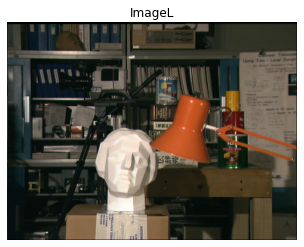

(-0.5, 383.5, 287.5, -0.5)

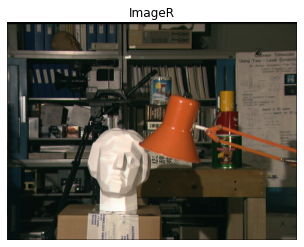

In [4]:
plt.title("ImageL")
plt.imshow(imgL)
plt.axis('off')
plt.show()
plt.title("ImageR")
plt.imshow(imgR)
plt.axis('off')


# Helpers:

In [5]:
MAX_DISP = 16 
LAMBDA = 100.0 

class Timer():
    def __init__(self):
        self.start = None
        self.end = None
          
    def __enter__(self):
        self.start = time.time()
        return self
      
    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.end = time.time()
        print('elasped secs: {:.2f}'.format(self.end - self.start))
        

def data_term(im1, im2):
    diff = np.linalg.norm(im1-im2, axis=-1)
    return diff 

def smoothness_term(d1, d2):
    if d1 == d2:
        return 0.
    else:
        return LAMBDA 

def compute_data_cost(imgL, imgR): 
    h, w, _ = imgL.shape
    cost = np.zeros((h,w, MAX_DISP))
    for y in range(0, h):
        for x in range(0, w):
            for d in range(0, MAX_DISP):
                if x-d >=0:
                    cost[y,x,d] = np.linalg.norm(imgL[y,x] - imgR[y,x-d])
                else:
                    cost[y,x,d] = 1e9
    return cost
                              
def compute_msg_fwd(data_cost):
    h, w , _ = data_cost.shape
    msgs = np.zeros((h,w, MAX_DISP))
    # TODO:
    # compute fwd messages
    return msgs

    
def compute_msg_bwd(data_cost):
    h, w , _ = data_cost.shape
    msgs = np.zeros((h,w, MAX_DISP))
    # TODO:
    # compute bwd messages
    return msgs
        
def compute_disparity_scanline(imgL, imgR):
    h , w,_ = imgL.shape
    imgL = imgL.astype(np.float32)
    imgR = imgR.astype(np.float32)
    
    print("Precomputing data costs:")
    with Timer():
        data_cost = compute_data_cost(imgL, imgR)
    
    print("Precomputing forward messages:")
    with Timer():
        msg_fwd = compute_msg_fwd(data_cost)
    print("Precomputing backward messages:")
    with Timer():
        msg_bwd = compute_msg_bwd(data_cost)
    
    print("Computing disparity map:")
    with Timer():
        cost = data_cost + msg_fwd + msg_bwd
        disparity_map = cost.argmin(axis=-1) 
    return disparity_map 

def show_disparity_map(disp):
    disp = ((disp/MAX_DISP)*255).astype(np.uint8)
    plt.imshow(disp, cmap="gray") 
    plt.axis("off")
    
    
    
    

# Disparity map without belief propagation

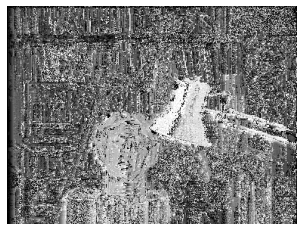

In [6]:
data_cost = compute_data_cost(imgL, imgR)
disparity_map = data_cost.argmin(axis=-1)
show_disparity_map(disparity_map)

# Now with belief propagation...

In [8]:
#TODO
#disparity_map = compute_disparity_scanline(imgL, imgR)
#show_disparity_map(disparity_map)

# Some things to explore further: 
* Vectorize the solution and measure speedup or even implement in it C/C++. 
* Play around  with regularization term. 
* Play around with the data term.

# $\star$ $\star$  Question 2 
Run loopy belief propagation after adding pairwise potentials to vertical neighbors.
Visualize also intermediate results every few iterations.
Does the process converge to a stable solution?